## Final Project
Description: 此為機器學習課程期末報告，題目為Kaggle競賽上的House Pricing Problem 
https://www.kaggle.com/c/house-prices-advanced-regression-techniques
透過資料分析、資料清洗、特徵萃取、特徵工程等步驟，建立多個不同的模型，並比較模型間的準確率高低、R-square score。

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
%matplotlib inline
import seaborn as sns
sns.set()

## Step 1: Import the dataset

In [2]:
house_price = pd.read_csv('house_price.csv')

## Step 2 : Exploratory Data Analysis 

In [3]:
house_price.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Id,1460.0,NaN,NaN,NaN,730.5,421.610009,1.0,365.75,730.5,1095.25,1460.0
MSSubClass,1460.0,NaN,NaN,NaN,56.89726,42.300571,20.0,20.0,50.0,70.0,190.0
MSZoning,1460,5,RL,1151,NaN,NaN,NaN,NaN,NaN,NaN,NaN
LotFrontage,1201.0,NaN,NaN,NaN,70.049958,24.284752,21.0,59.0,69.0,80.0,313.0
LotArea,1460.0,NaN,NaN,NaN,10516.828082,9981.264932,1300.0,7553.5,9478.5,11601.5,215245.0
...,...,...,...,...,...,...,...,...,...,...,...
MoSold,1460.0,NaN,NaN,NaN,6.321918,2.703626,1.0,5.0,6.0,8.0,12.0
YrSold,1460.0,NaN,NaN,NaN,2007.815753,1.328095,2006.0,2007.0,2008.0,2009.0,2010.0
SaleType,1460,9,WD,1267,NaN,NaN,NaN,NaN,NaN,NaN,NaN
SaleCondition,1460,6,Normal,1198,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
house_price.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

<Axes: xlabel='SalePrice', ylabel='Count'>

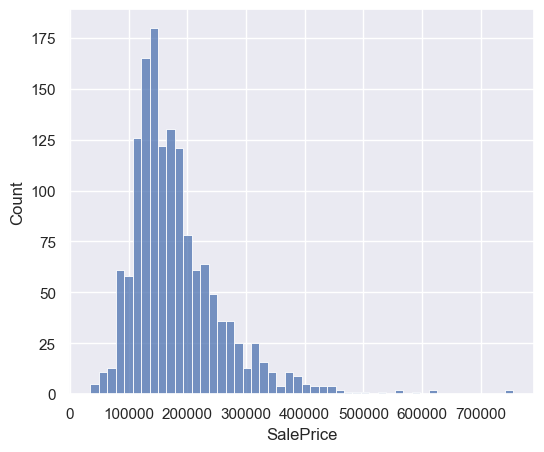

In [5]:
plt.figure(figsize=(6,5))
sns.set_style("darkgrid")
sns.histplot(data=house_price, x="SalePrice", bins=50,cbar=True)

In [6]:
# Skew and kurtosis for SalePrice (skew:偏態係數、kurtosis:峰態係數)
print("Skewness: %f" % house_price['SalePrice'].skew())
print("Kurtosis: %f" % house_price['SalePrice'].kurt())

Skewness: 1.882876
Kurtosis: 6.536282


In [7]:
#Applying log transformation to remove skewness and make target variable normally distributed
X = house_price.drop('SalePrice' , axis = 1)
y = np.log1p(house_price['SalePrice'])
print(X.shape, y.shape)

(1460, 80) (1460,)


<Axes: xlabel='SalePrice', ylabel='Count'>

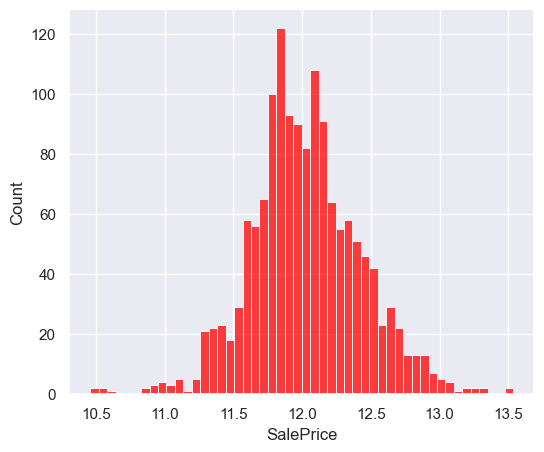

In [8]:
plt.figure(figsize=(6,5))
sns.set_style("darkgrid")
sns.histplot(data=y, bins=50,cbar=True,color="red")
#Now it is normally distributed

In [9]:
# Check the correlation between the target and other features 
house_price.corr()['SalePrice'].sort_values(ascending=False)

C:\Users\user\AppData\Local\Temp\ipykernel_4572\148523755.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  house_price.corr()['SalePrice'].sort_values(ascending=False)


SalePrice        1.000000
OverallQual      0.790982
GrLivArea        0.708624
GarageCars       0.640409
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
FullBath         0.560664
TotRmsAbvGrd     0.533723
YearBuilt        0.522897
YearRemodAdd     0.507101
GarageYrBlt      0.486362
MasVnrArea       0.477493
Fireplaces       0.466929
BsmtFinSF1       0.386420
LotFrontage      0.351799
WoodDeckSF       0.324413
2ndFlrSF         0.319334
OpenPorchSF      0.315856
HalfBath         0.284108
LotArea          0.263843
BsmtFullBath     0.227122
BsmtUnfSF        0.214479
BedroomAbvGr     0.168213
ScreenPorch      0.111447
PoolArea         0.092404
MoSold           0.046432
3SsnPorch        0.044584
BsmtFinSF2      -0.011378
BsmtHalfBath    -0.016844
MiscVal         -0.021190
Id              -0.021917
LowQualFinSF    -0.025606
YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
Name: SalePr

+ ### Pair Plots for the Features & the Target

<Axes: xlabel='OverallQual', ylabel='SalePrice'>

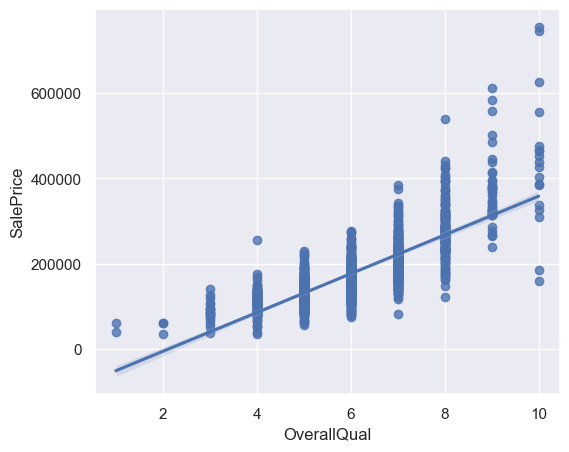

In [10]:
# OverallQual has the highest positive correlation with the target
plt.figure(figsize=(6,5))
sns.regplot(x="OverallQual", y="SalePrice",data=house_price)

<Axes: xlabel='KitchenAbvGr', ylabel='SalePrice'>

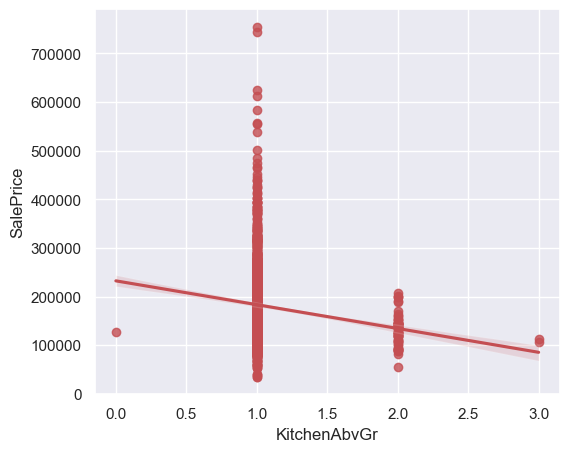

In [11]:
# KitchenAbvGr has the highest negative correlation with the target
plt.figure(figsize=(6,5))
sns.regplot(x="KitchenAbvGr", y="SalePrice",data=house_price,color='r')

<Axes: xlabel='BsmtFinSF2', ylabel='SalePrice'>

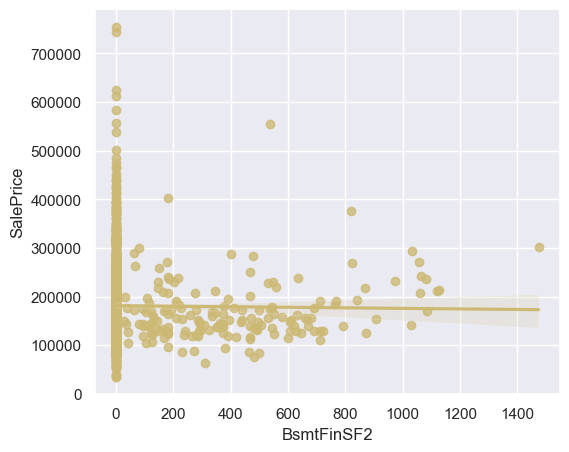

In [13]:
# BsmtFinSF2 is nearly uncorrelated with the target
plt.figure(figsize=(6,5))
sns.regplot(x="BsmtFinSF2", y="SalePrice",data=house_price,color='y')

+ ### Correlation matrix for all features in Dataset

C:\Users\user\AppData\Local\Temp\ipykernel_4572\3824936425.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(house_price.corr(),    # Heat map for correlation matrix


<Axes: >

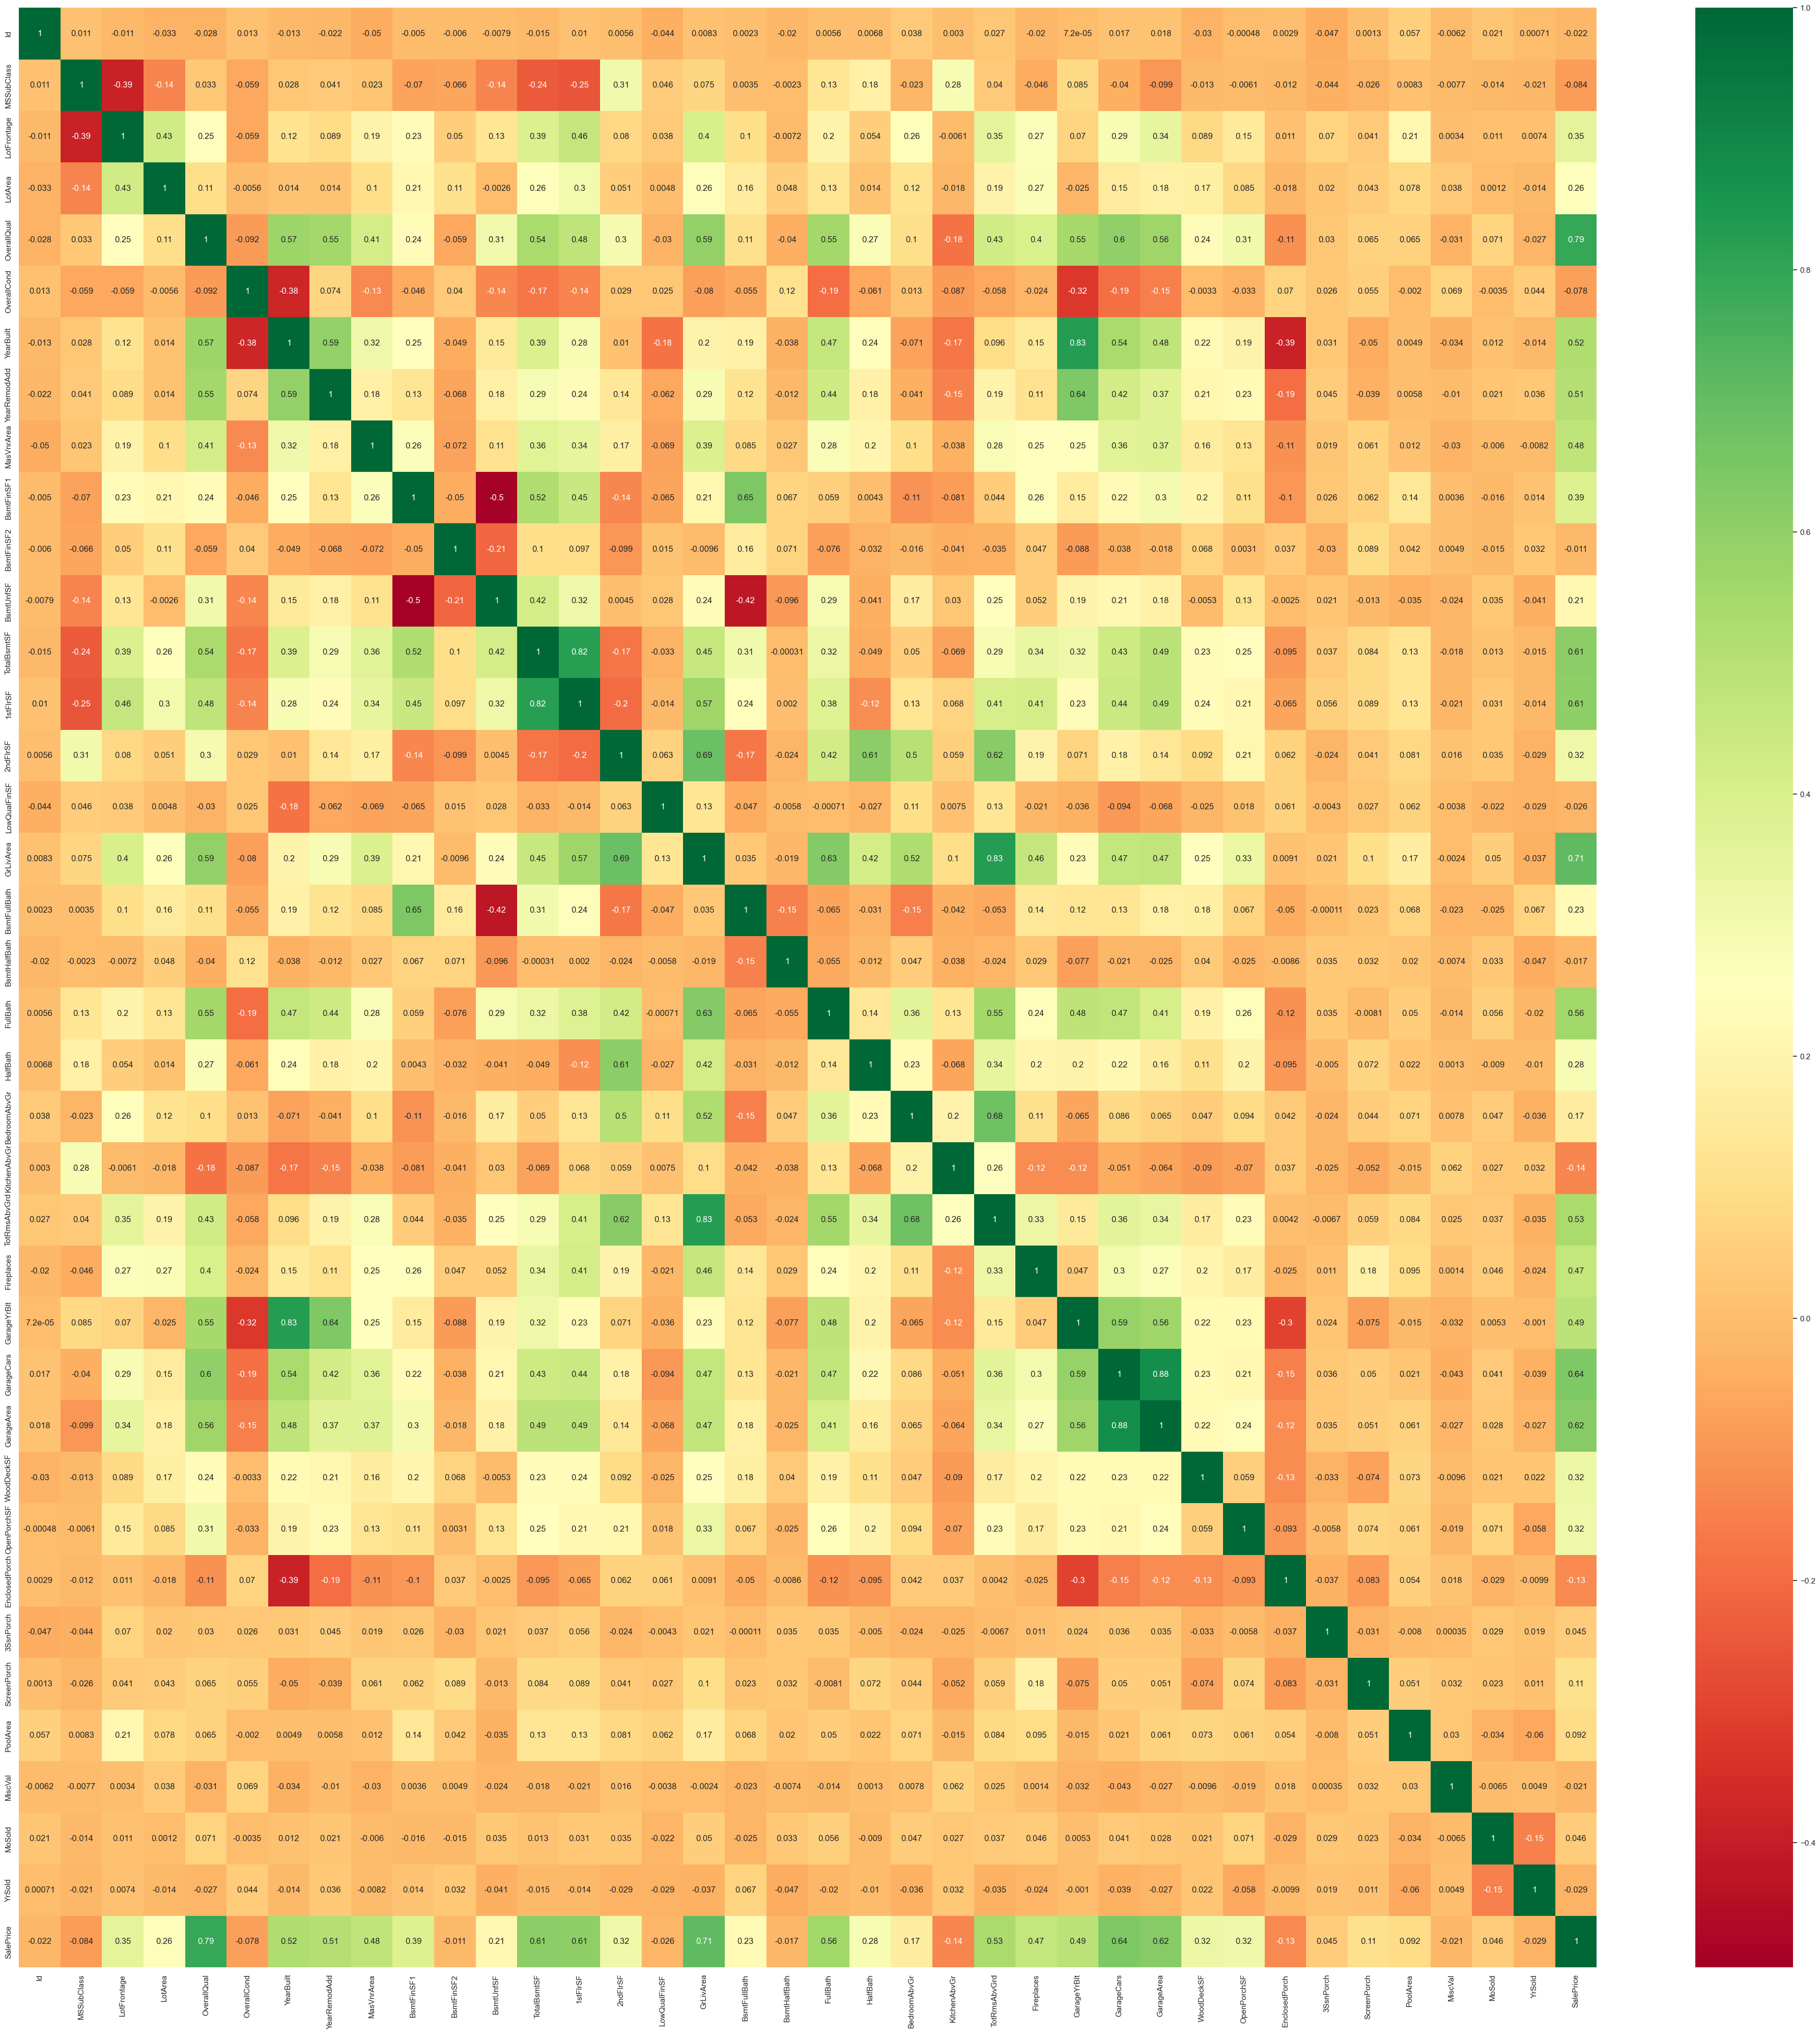

In [15]:
# Correlation matrix for all features in Dataset
plt.figure(figsize=(50,50))
sns.heatmap(house_price.corr(),    # Heat map for correlation matrix
            annot=True,cmap="RdYlGn")

## Step3: Data preprocessing & cleansing for the features

In [16]:
# remove Id since it is unique and hence not useful for the model
X.drop(['Id'], axis=1, inplace=True)
X.shape

(1460, 79)

+ ### Fill missing values

In [17]:
# determine the threshold for missing values
def percent_missing(data):
    df_cols = list(pd.DataFrame(data))
    dict_x = {}
    for i in range(0, len(df_cols)):
        dict_x.update({df_cols[i]: round(data[df_cols[i]].isnull().mean()*100,2)})
    
    return dict_x

missing = percent_missing(X)
df_miss = sorted(missing.items(), key=lambda x: x[1], reverse=True)
print('Percent of missing data')
df_miss[0:10]

Percent of missing data


[('PoolQC', 99.52),
 ('MiscFeature', 96.3),
 ('Alley', 93.77),
 ('Fence', 80.75),
 ('FireplaceQu', 47.26),
 ('LotFrontage', 17.74),
 ('GarageType', 5.55),
 ('GarageYrBlt', 5.55),
 ('GarageFinish', 5.55),
 ('GarageQual', 5.55)]

<Axes: >

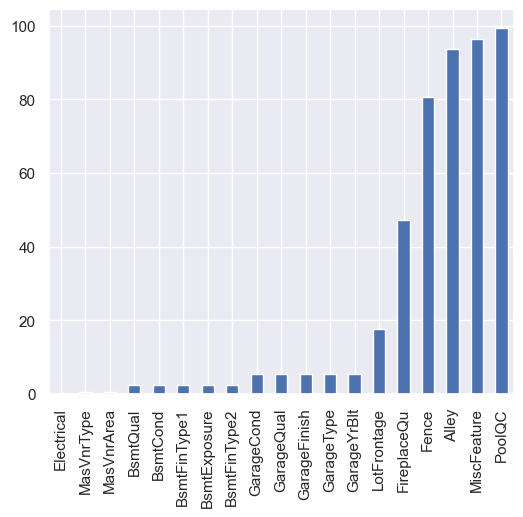

In [18]:
# Visualize missing values
plt.figure(1, figsize=(6, 5))
missing = round(X.isnull().mean()*100,2)
missing = missing[missing > 0]
missing.sort_values(inplace=True)
missing.plot.bar(color="b")

In [19]:
def handle_missing(features):
    
    # replace missing values with None for object categories
    objects = []
    for i in features.columns:
        if features[i].dtype == object:
            objects.append(i)
    features.update(features[objects].fillna('None'))
    
    # do the same thing for numerical features
    numeric_dtypes = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
    numeric = []
    for i in features.columns:
        if features[i].dtype in numeric_dtypes:
            numeric.append(i)
    features.update(features[numeric].fillna(0))    
    return features

X = handle_missing (X)

In [20]:
# Let's make sure we handled all the missing values
missing = percent_missing(X)
df_miss = sorted(missing.items(), key=lambda x: x[1], reverse=True)
print('Percent of missing data')
df_miss[0:10]

Percent of missing data


[('MSSubClass', 0.0),
 ('MSZoning', 0.0),
 ('LotFrontage', 0.0),
 ('LotArea', 0.0),
 ('Street', 0.0),
 ('Alley', 0.0),
 ('LotShape', 0.0),
 ('LandContour', 0.0),
 ('Utilities', 0.0),
 ('LotConfig', 0.0)]

+ ### Fixing skewed Numerical Columns:

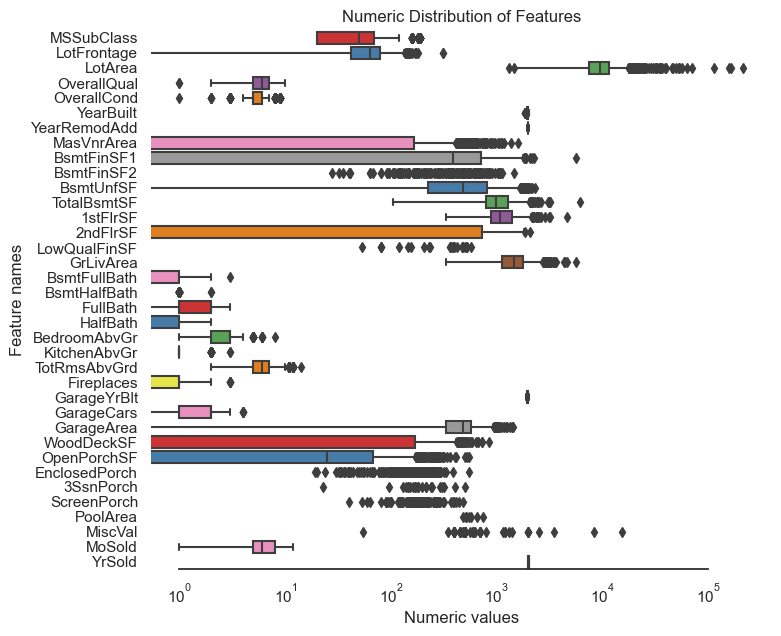

In [21]:
# Creating box plots for all numeric columns:
num_cols = X.columns[X.dtypes != "object"]
sns.set_style("white")
f, ax = plt.subplots(figsize=(8, 7))
ax.set_xscale("log")
ax = sns.boxplot(data=X[num_cols] , orient="h", palette="Set1")
ax.xaxis.grid(False)
ax.set(ylabel="Feature names")
ax.set(xlabel="Numeric values")
ax.set(title="Numeric Distribution of Features")
sns.despine(trim=True, left=True)

In [22]:
# Stats
from scipy.stats import skew, norm
from scipy.special import boxcox1p
from scipy.stats import boxcox_normmax

In [23]:
# Finding skewed numerical columns:
skew_columns = X[num_cols].apply(lambda x: skew(x)).sort_values(ascending=False)

high_skew = skew_columns[skew_columns > 0.5]
skew_index = high_skew.index

print("There are {} numerical features with Skew > 0.5 :".format(high_skew.shape[0]))
skewness = pd.DataFrame({'Skew' :high_skew})
skew_columns

There are 25 numerical features with Skew > 0.5 :


MiscVal          24.451640
PoolArea         14.813135
LotArea          12.195142
3SsnPorch        10.293752
LowQualFinSF      9.002080
KitchenAbvGr      4.483784
BsmtFinSF2        4.250888
ScreenPorch       4.117977
BsmtHalfBath      4.099186
EnclosedPorch     3.086696
MasVnrArea        2.674865
OpenPorchSF       2.361912
BsmtFinSF1        1.683771
WoodDeckSF        1.539792
TotalBsmtSF       1.522688
MSSubClass        1.406210
1stFlrSF          1.375342
GrLivArea         1.365156
BsmtUnfSF         0.919323
2ndFlrSF          0.812194
OverallCond       0.692355
TotRmsAbvGrd      0.675646
HalfBath          0.675203
Fireplaces        0.648898
BsmtFullBath      0.595454
LotFrontage       0.267547
OverallQual       0.216721
MoSold            0.211835
BedroomAbvGr      0.211572
GarageArea        0.179796
YrSold            0.096170
FullBath          0.036524
GarageCars       -0.342197
YearRemodAdd     -0.503044
YearBuilt        -0.612831
GarageYrBlt      -3.865524
dtype: float64

In [24]:
# Lets normalize skewed features
for i in skew_index:
    X[i] = boxcox1p(X[i], boxcox_normmax(X[i] + 1))

C:\Users\user\.conda\lib\site-packages\scipy\stats\_stats_py.py:4424: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(msg))
C:\Users\user\.conda\lib\site-packages\scipy\stats\_stats_py.py:4461: NearConstantInputWarning: An input array is nearly constant; the computed correlation coefficient may be inaccurate.
  warnings.warn(stats.NearConstantInputWarning(msg))


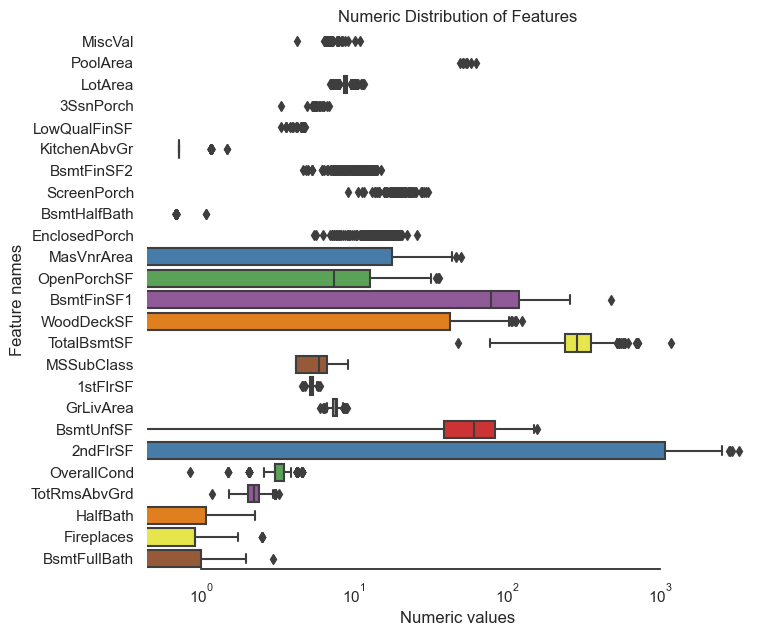

In [25]:
# Let's make sure we handled all the skewed values
sns.set_style("white")
f, ax = plt.subplots(figsize=(8, 7))
ax.set_xscale("log")
ax = sns.boxplot(data=X[skew_index] , orient="h", palette="Set1")
ax.xaxis.grid(False)
ax.set(ylabel="Feature names")
ax.set(xlabel="Numeric values")
ax.set(title="Numeric Distribution of Features")
sns.despine(trim=True, left=True)
#Now all the numerical seems to be normally distributed

+ ### Handling the text and categorical columns

In [26]:
X = pd.get_dummies(X).reset_index(drop=True)
X.shape

(1460, 303)

In [27]:
X.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,6.281283,65.0,8.670457,7,3.036931,2003,2003,19.340340,118.098015,0.0,...,0,0,0,1,0,0,0,0,1,0
1,4.146687,80.0,8.787629,6,4.241668,1976,1976,0.000000,147.125761,0.0,...,0,0,0,1,0,0,0,0,1,0
2,6.281283,68.0,8.933084,7,3.036931,2001,2002,17.687638,91.750448,0.0,...,0,0,0,1,0,0,0,0,1,0
3,6.622580,60.0,8.782836,7,3.036931,1915,1970,0.000000,52.861356,0.0,...,0,0,0,1,1,0,0,0,0,0
4,6.281283,84.0,9.150118,8,3.036931,2000,2000,25.266441,112.267323,0.0,...,0,0,0,1,0,0,0,0,1,0


In [28]:
# Remove any duplicated column names
X = X.loc[:,~X.columns.duplicated()]

## Step 4: Feature Engineering
Here I use four different ways to pick up the important features.

### 4.1 Removing features with low variance

In [27]:
from sklearn.feature_selection import VarianceThreshold
sel = VarianceThreshold(threshold=(.5 * (1 - .5)))  # p = 0.5
X_remove_variance = sel.fit_transform(X)
X_remove_variance.shape

(1460, 29)

In [28]:
X.columns[sel.get_support()]   # 29 features remained

Index(['MSSubClass', 'LotFrontage', 'OverallQual', 'YearBuilt', 'YearRemodAdd',
       'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF',
       '2ndFlrSF', 'LowQualFinSF', 'BsmtFullBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea',
       'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
       'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold'],
      dtype='object')

### 4.2 Univariate feature selection

In [35]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression, mutual_info_regression

##  Selecting Top 30 Best Features using SelectKBest class
kf = SelectKBest(score_func=f_regression, k=30)
km = SelectKBest(score_func=mutual_info_regression, k=30)

kf_fit = kf.fit(X,y)
km_fit = km.fit(X,y)

kf_scores = pd.DataFrame(kf_fit.scores_)  # Scores of features.
km_scores = pd.DataFrame(km_fit.scores_)  # Scores of features.
X_columns = pd.DataFrame(X.columns)

# Combine dataframes ... 
featureScores = pd.concat([X_columns, kf_scores, km_scores], axis=1)
# Naming the dataframe's columns ...
featureScores.columns = ['Features', 'f-test_Scores', 'mutual_info_scores'] 
featureScores

,Features,f-test_Scores,mutual_info_scores
0,MSSubClass,1.213046,0.266803
1,LotFrontage,48.431181,0.207252
2,LotArea,277.331943,0.199056
3,OverallQual,2930.799393,0.572404
4,OverallCond,0.748414,0.111210
...,...,...,...
298,SaleCondition_AdjLand,6.178778,0.002254
299,SaleCondition_Alloca,0.910697,0.000000
300,SaleCondition_Family,3.033680,0.000000
301,SaleCondition_Normal,15.279408,0.026585


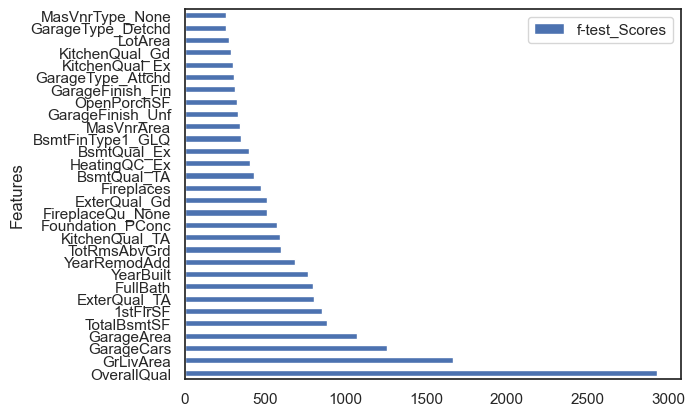

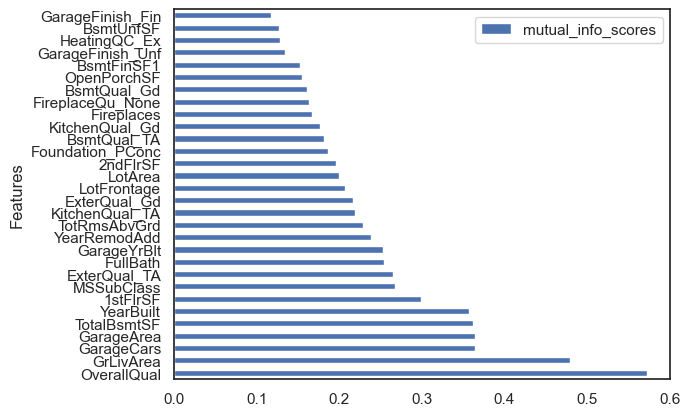

In [36]:
# pands plot
for i in range(2):    
    fs = featureScores.columns[i+1]
    best_features = featureScores.nlargest(30, fs)[['Features', fs]]
    best_features.plot.barh('Features');   # pands plot()

### 4.3 Recursive feature elimination

In [79]:
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier
# rfc = RandomForestClassifier(random_state=100, n_estimators=50)
rfc = RandomForestClassifier(random_state=100, n_estimators=30)

rfe_model = RFE(rfc, n_features_to_select = 25, # Select 25 features
                step = 1)  # step = 1 : remove one at a time
rfe = rfe_model.fit(X, y.astype('int'))

In [80]:
X.columns[rfe.support_]

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtUnfSF',
       'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'FullBath',
       'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea',
       'OpenPorchSF', 'MoSold', 'ExterQual_TA', 'Foundation_PConc',
       'FireplaceQu_None'],
      dtype='object')

### 4.4 Feature selection using `SelectFromModel`

+ ### L1-based feature selection

In [122]:
from sklearn.svm import LinearSVC  # Linear Support Vector Classification
from sklearn.feature_selection import SelectFromModel

lsvc = LinearSVC(C=0.0001, penalty="l1", dual=False)
lsvc_model = SelectFromModel(lsvc).fit(X, house_price['SalePrice'])
X_lsvc = lsvc_model.transform(X)
X_lsvc.shape

C:\Users\user\.conda\lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


(1460, 5)

In [123]:
X.columns[lsvc_model.get_support()]

Index(['YearBuilt', 'YearRemodAdd', '2ndFlrSF', 'GarageYrBlt', 'YrSold'], dtype='object')

+ ### Feature Importance

DecisionTree > feature importances : 



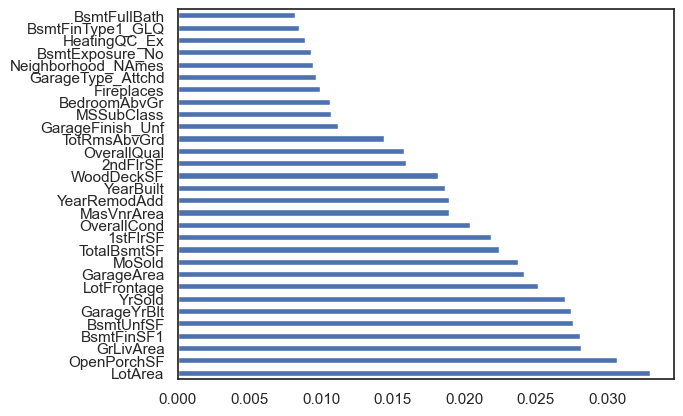

RandomForest > feature importances : 



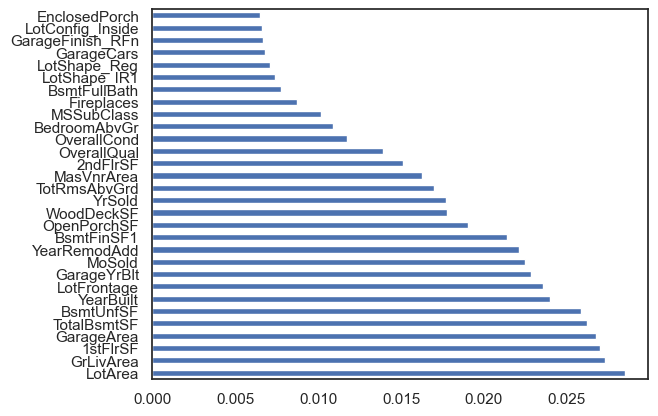

ExtraTrees > feature importances : 



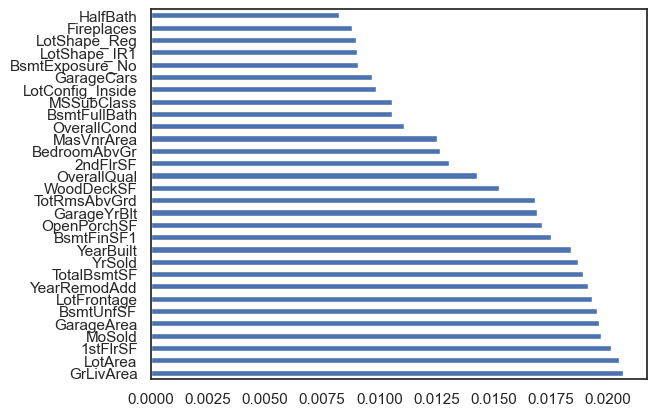

In [34]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier 
from sklearn.ensemble import ExtraTreesClassifier

model = [DecisionTreeClassifier(), 
         RandomForestClassifier(n_estimators=100),
         ExtraTreesClassifier(n_estimators=100)]

model = [model[i].fit(X,house_price['SalePrice']) for i in range(len(model))]

num_chr = [12, 12, 10]

for i in range(len(model)):
    print(str(model[i])[:num_chr[i]] + ' > feature importances : \n')
    #print(str(model[i])[:num_chr[i]] + ' > feature importances : \n', 
          # model[i].feature_importances_) 
    feat_importances = pd.Series(model[i].feature_importances_, 
                                 index=X.columns)
    feat_importances.nlargest(30).plot.barh()
    plt.show()

---------------------
**< Summary > :** 
+ By comparing the **feature importance** results from 3 different tree-based estimators above, it turns out that the 23 featutres,*`OverallQual`,`LotFrontage`,`LotArea`,`YearBuilt`,`YearRemodAdd`,`MasVnrArea`,`BsmtFinSF1`,`BsmtUnfSF`,`TotalBsmtSF`,`1stFlrSF`,`2ndFlrSF`,`LowQualFinSF`,`GrLivArea`,`GarageYrBlt`,`GarageArea`,`WoodDeckSF`,`OpenPorchSF`,`EnclosedPorch`,`3SsnPorch`,`ScreenPorch`,`PoolArea`,`MiscVal` and `YrSold`* could be adopted for machine learning.

---------------------

## Step 5: Regression of `House Price` dataset

In [37]:
# I decide to use the features from second method(step 4.2)
X_features = X[list(best_features['Features'])]

X_features

,OverallQual,GrLivArea,GarageCars,GarageArea,TotalBsmtSF,YearBuilt,1stFlrSF,MSSubClass,ExterQual_TA,FullBath,...,KitchenQual_Gd,Fireplaces,FireplaceQu_None,BsmtQual_Gd,OpenPorchSF,BsmtFinSF1,GarageFinish_Unf,HeatingQC_Ex,BsmtUnfSF,GarageFinish_Fin
0,7,7.744828,2,548,252.446438,2003,5.133687,6.281283,0,2,...,1,0.000000,1,1,12.049772,118.098015,0,1,30.319786,0
1,6,7.416974,2,460,342.556400,1976,5.348117,4.146687,1,2,...,0,0.919485,0,1,0.000000,147.125761,0,1,44.696310,0
2,7,7.791848,2,608,267.178807,2001,5.174048,6.281283,0,2,...,1,0.919485,0,1,9.878686,91.750448,0,1,57.687342,0
3,7,7.749245,3,642,228.937499,1915,5.198336,6.622580,1,1,...,1,0.919485,0,0,8.946971,52.861356,1,0,65.749913,0
4,8,8.016603,3,836,317.335308,2000,5.295030,6.281283,0,2,...,1,0.919485,0,1,14.232143,112.267323,0,1,62.037604,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,6,7.704257,2,460,274.688067,1999,5.193686,6.281283,1,2,...,0,0.919485,0,1,9.621565,0.000000,0,1,92.226291,0
1456,6,7.953152,2,500,400.974768,1978,5.612228,4.146687,1,2,...,0,1.738588,0,1,0.000000,127.405893,1,0,69.251672,0
1457,7,8.084490,1,252,318.859439,1941,5.315197,6.622580,0,2,...,1,1.738588,0,0,11.945499,62.328751,0,1,87.783190,0
1458,5,7.247347,1,240,302.643002,1950,5.261909,4.146687,1,1,...,1,0.000000,1,0,0.000000,18.905205,1,0,0.000000,0


+ ### Training Data vs. Test Data

In [38]:
# Split the dataset with 95% for training data
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_features, y,test_size=0.05,random_state=42)

### Model 1: Polynomial Regression

In [39]:
# PolynomialRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline

def PolynomialRegression(degree = 1, **kwargs):
    return make_pipeline(PolynomialFeatures(degree),
                         LinearRegression(**kwargs))

+ ### Learning degree of Polynomial Regression

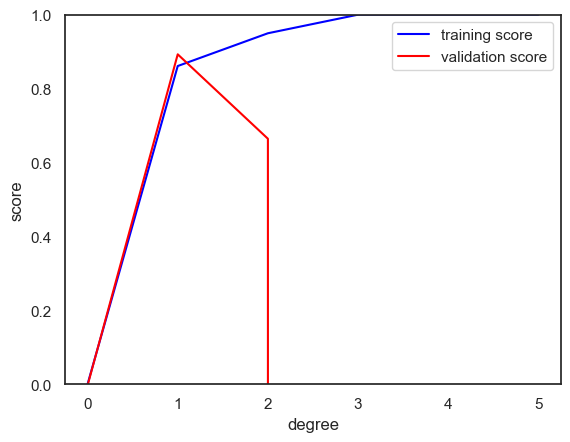

In [40]:
from sklearn.model_selection import validation_curve
degree = np.arange(0, 21)
train_score, val_score = validation_curve(PolynomialRegression(), X_train, y_train, param_name = 'polynomialfeatures__degree', 
                                          param_range = degree, cv=5)

plt.plot(degree, np.median(train_score, 1), color='blue', label='training score')
plt.plot(degree, np.median(val_score, 1), color='red', label='validation score')
plt.legend(loc='best')
plt.ylim(0, 1)
plt.xlabel('degree')
plt.ylabel('score');

---------------------
**< Summary > :** 
+ Therefore, by cross-validation and grid-search, the best degree is 1.

---------------------

In [42]:
model1 = PolynomialRegression(degree = 1)
model1 = model1.fit(X_train,y_train)
pred1 = model1.predict(X_test)

In [43]:
from sklearn.metrics import mean_squared_error, r2_score
print("Root mean squared error: %.2f" % math.sqrt(mean_squared_error(y_test, pred1)))
print('Variance score: %.2f' % r2_score(y_test, pred1))

Root mean squared error: 0.11
Variance score: 0.92


In [44]:
RMSE =[]; RMSE.append(math.sqrt(mean_squared_error(y_test, pred1)))
R_square = []; R_square.append(r2_score(y_test, pred1))

<Axes: ylabel='SalePrice'>

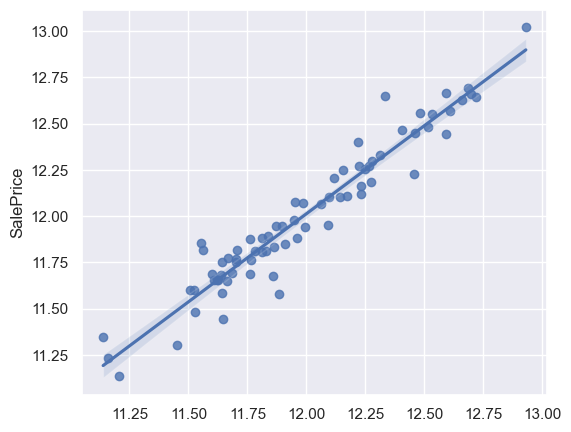

In [46]:
sns.set_style('darkgrid')
plt.figure(figsize=(6,5))
sns.regplot(x=pred1,y=y_test)

### Model 2: KNeighborsRegressor

In [40]:
from sklearn.neighbors import KNeighborsRegressor

In [186]:
param_grid = {'n_neighbors': np.arange(21)}
grid = GridSearchCV(KNeighborsRegressor(), param_grid, cv=20)
grid.fit(X_train,y_train)
grid.best_params_

C:\Users\user\.conda\lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
20 fits failed out of a total of 420.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
20 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\user\.conda\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\user\.conda\lib\site-packages\sklearn\neighbors\_regression.py", line 215, in fit
    self._validate_params()
  File "C:\Users\user\.conda\lib\site-packages\sklearn\base.py", line 600, in _validate_params
    validate_parameter_constraints(
  File "C:\Users\user\.conda\lib\site-packages\sklearn\util

{'n_neighbors': 12}

In [111]:
model2 = KNeighborsRegressor(n_neighbors=7)
model2 = model2.fit(X_train,y_train)
pred2 = model2.predict(X_test)

In [112]:
print("Root mean squared error: %.2f" % math.sqrt(mean_squared_error(y_test, pred2)))
print('Variance score: %.2f' % r2_score(y_test, pred2))

Root mean squared error: 0.20
Variance score: 0.74


In [113]:
RMSE.append(math.sqrt(mean_squared_error(y_test, pred2)))
R_square.append(r2_score(y_test, pred2))

### Model 3: SVR

In [114]:
from sklearn.svm import SVR

In [131]:
param_grid = {'C': np.arange(10),'degree':np.arange(10)}
grid = GridSearchCV(SVR(), param_grid, cv=10)
grid.fit(X_train,y_train)
grid.best_params_

C:\Users\user\.conda\lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
100 fits failed out of a total of 1000.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
100 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\user\.conda\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\user\.conda\lib\site-packages\sklearn\svm\_base.py", line 180, in fit
    self._validate_params()
  File "C:\Users\user\.conda\lib\site-packages\sklearn\base.py", line 600, in _validate_params
    validate_parameter_constraints(
  File "C:\Users\user\.conda\lib\site-packages\sklearn\utils\_param_

{'C': 9, 'degree': 0}

In [132]:
model3 = SVR(C=9,degree=0)
model3 = model3.fit(X_train,y_train)
pred3 = model3.predict(X_test)

In [133]:
print("Root mean squared error: %.2f" % math.sqrt(mean_squared_error(y_test, pred3)))
print('Variance score: %.2f' % r2_score(y_test, pred3))

Root mean squared error: 0.18
Variance score: 0.78


In [134]:
RMSE.append(math.sqrt(mean_squared_error(y_test, pred3)))
R_square.append(r2_score(y_test, pred3))

### Model 4: DecisionTreeRegressor 

In [135]:
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree

In [106]:
param_grid = {'max_leaf_nodes': np.arange(150),'random_state':[0,10,14]}
grid = GridSearchCV(DecisionTreeRegressor(), param_grid, cv=15)
grid.fit(X_train,y_train)
grid.best_params_

C:\Users\user\.conda\lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
90 fits failed out of a total of 6750.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
45 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\user\.conda\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\user\.conda\lib\site-packages\sklearn\tree\_classes.py", line 1247, in fit
    super().fit(
  File "C:\Users\user\.conda\lib\site-packages\sklearn\tree\_classes.py", line 177, in fit
    self._validate_params()
  File "C:\Users\user\.conda\lib\site-packages\sklearn\base.py", line 600, in _validate_

{'max_leaf_nodes': 83, 'random_state': 14}

In [136]:
model4 = DecisionTreeRegressor(max_leaf_nodes=83, random_state=14)
model4 = model4.fit(X_train,y_train)
pred4 = model4.predict(X_test)

In [137]:
print("Root mean squared error: %.2f" % math.sqrt(mean_squared_error(y_test, pred4)))
print('Variance score: %.2f' % r2_score(y_test, pred4))

Root mean squared error: 0.16
Variance score: 0.84


In [138]:
RMSE.append(math.sqrt(mean_squared_error(y_test, pred4)))
R_square.append(r2_score(y_test, pred4))

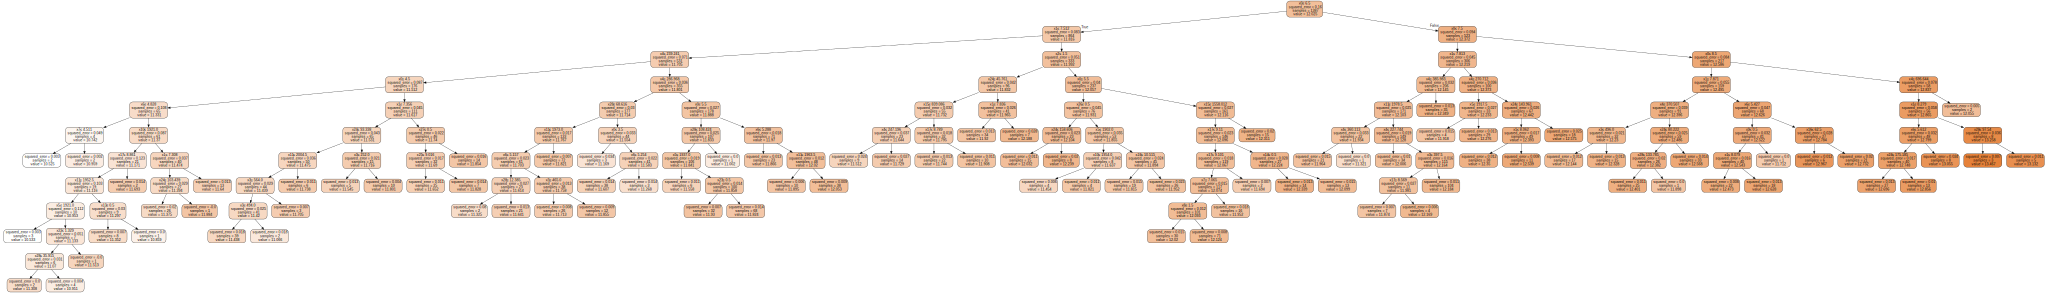

In [139]:
# visualizing the decision tree
import graphviz 
dot_data = tree.export_graphviz(model4, out_file=None, 
                         filled=True, rounded=True,  
                         special_characters=True)  
graph = graphviz.Source(dot_data)  
graph 

### Model 5: RandomForestRegressor

In [140]:
from sklearn.ensemble import RandomForestRegressor

In [103]:
param_grid = {'max_depth': np.arange(15),'random_state':[0,10,14]}
grid = GridSearchCV(RandomForestRegressor(), param_grid, cv=15)
grid.fit(X_train,y_train)
grid.best_params_

C:\Users\user\.conda\lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
45 fits failed out of a total of 675.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
45 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\user\.conda\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\user\.conda\lib\site-packages\sklearn\ensemble\_forest.py", line 340, in fit
    self._validate_params()
  File "C:\Users\user\.conda\lib\site-packages\sklearn\base.py", line 600, in _validate_params
    validate_parameter_constraints(
  File "C:\Users\user\.conda\lib\site-packages\sklearn\utils\_pa

{'max_depth': 13, 'random_state': 10}

In [141]:
model5 = RandomForestRegressor(max_depth = 13, random_state=10)
model5 = model5.fit(X_train,y_train)
pred5 = model5.predict(X_test)

In [142]:
print("Root Mean squared error: %.2f" % math.sqrt(mean_squared_error(y_test, pred5)))
print('Variance score: %.2f' % r2_score(y_test, pred5))

Root Mean squared error: 0.11
Variance score: 0.92


In [143]:
RMSE.append(math.sqrt(mean_squared_error(y_test, pred5)))
R_square.append(r2_score(y_test, pred5))

### Model 6: XGBRegressor 

In [61]:
from xgboost import XGBRegressor

In [93]:
param_grid = {'max_depth': np.arange(10),'min_child_weight': np.arange(10)}
grid = GridSearchCV(XGBRegressor(), param_grid, cv=10)
grid.fit(X_train,y_train)
grid.best_params_

C:\Users\user\.conda\lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
100 fits failed out of a total of 1000.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
63 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\user\.conda\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\user\.conda\lib\site-packages\xgboost\core.py", line 620, in inner_f
    return func(**kwargs)
  File "C:\Users\user\.conda\lib\site-packages\xgboost\sklearn.py", line 1025, in fit
    self._Booster = train(
  File "C:\Users\user\.conda\lib\site-packages\xgboost\core.py", line 620, in inner_f
    

{'max_depth': 2, 'min_child_weight': 0}

In [144]:
model6 = XGBRegressor(max_depth = 2, min_child_weight=0)
model6 = model6.fit(X_train,y_train)
pred6 = model6.predict(X_test)

In [145]:
print("Root mean squared error: %.2f" % math.sqrt(mean_squared_error(y_test, pred6)))
print('Variance score: %.2f' % r2_score(y_test, pred6))

Root mean squared error: 0.11
Variance score: 0.92


In [146]:
RMSE.append(math.sqrt(mean_squared_error(y_test, pred6)))
R_square.append(r2_score(y_test, pred6))

### Model 7:MLPRegressor

In [65]:
from sklearn.neural_network import MLPRegressor

In [82]:
param_grid = {'random_state':[0,14],'max_iter': range(400,1001,100),'hidden_layer_sizes': [(10,5),(50,),(100,),(50,50),(100,100)] }
grid = GridSearchCV(MLPRegressor(), param_grid, cv=7)
grid.fit(X_train,y_train)
grid.best_params_

C:\Users\user\.conda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\user\.conda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\user\.conda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\user\.conda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\user\.conda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:

{'hidden_layer_sizes': (10, 5), 'max_iter': 800, 'random_state': 0}

In [147]:
model7 = MLPRegressor(random_state=0, max_iter=800, hidden_layer_sizes = (10,5), alpha = 0.00001)
model7 = model7.fit(X_train,y_train)
pred7 = model7.predict(X_test)

In [148]:
print("Root mean squared error: %.2f" % math.sqrt(mean_squared_error(y_test, pred7)))
print('Variance score: %.2f' % r2_score(y_test, pred7))

Root mean squared error: 0.24
Variance score: 0.64


In [149]:
RMSE.append(math.sqrt(mean_squared_error(y_test, pred7)))
R_square.append(r2_score(y_test, pred7))

## Step 6: Compare the result by R_square and RMSE

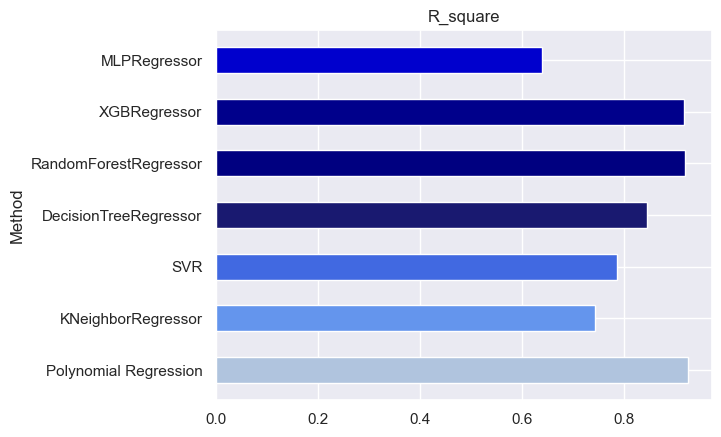

In [150]:
fig, ax = plt.subplots()
x = ['Polynomial Regression','KNeighborRegressor','SVR','DecisionTreeRegressor','RandomForestRegressor','XGBRegressor','MLPRegressor']
color=['lightsteelblue', 'cornflowerblue', 'royalblue', 'midnightblue', 'navy', 'darkblue', 'mediumblue']
plt.barh(x,R_square,color=color,height=0.5) 
ax.set_title('R_square')
ax.set_ylabel('Method')
plt.show()

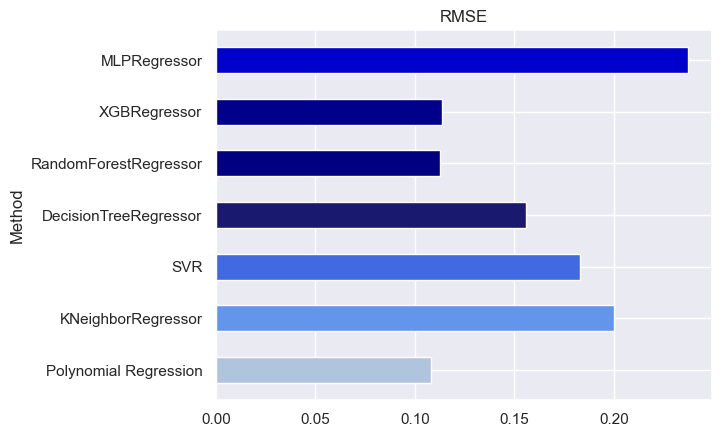

In [151]:
fig,ax = plt.subplots()
plt.barh(x,RMSE,color=color,height=0.5)
ax.set_title('RMSE')
ax.set_ylabel('Method')
plt.show()

## Discussion and Conclusion

從圖表中可以看到，Polynomial Regression 表現最好，然而 MLPregression fitting 的程度最差。我們推估可能的原因是 MLPregression為
sklearn中的神經網路，因此模型可以算是七種訓練模型中最為複雜的，且在訓練模型參數的過程中，R_square經常呈現負的，表示出現overfitting
的現象。另外，出乎意料的是，polynomial regression 竟是表現最好的模型，在訊練模型前，我們透過grid-search搜尋最佳的degree為1，
因此此模型等同於 linear regression。另外，特徵變數選用的數量，我們嘗試用過5、9、25、30，其中30個特徵所訓練的結果為最優。